In [ ]:
import random
import matplotlib.pyplot as plt
import time


In [ ]:
def generate_random_rods(n):
    lengths = []
    prices = []
    for _ in range(n):
        length = random.randint(1, 10)
        price = random.randint(1, 100)
        lengths.append(length)
        prices.append(price)
    return lengths, prices

Rod Lengths: [6, 2, 1, 2, 7, 9, 2, 7, 3, 2]
Prices: [12, 76, 54, 100, 82, 19, 36, 42, 8, 65]
Maximum Obtainable Price (Recursive): 508
Maximum Obtainable Price (Greedy): 508


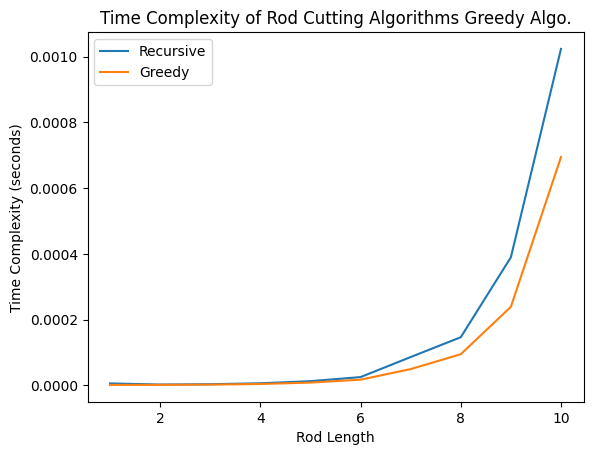

In [ ]:
def cut_rod(lengths, prices, n):
    if n <= 0:
        return 0
    
    max_price = float('-inf')
    for i in range(n):
        max_price = max(max_price, prices[i] + cut_rod(lengths, prices, n - lengths[i]))
    
    return max_price

def greedy_cut_rod(lengths, prices, n):
    if n <= 0:
        return 0
    
    max_price = 0
    for i in range(n):
        if lengths[i] <= n:
            max_price = max(max_price, prices[i] + greedy_cut_rod(lengths, prices, n - lengths[i]))
    
    return max_price

def plot_time_complexity(lengths, prices):
    n_values = []
    time_values = []
    greedy_time_values = []

    for n in range(1, len(lengths) + 1):
        start_time = time.time()
        cut_rod(lengths, prices, n)
        end_time = time.time()
        elapsed_time = end_time - start_time

        start_time = time.time()
        greedy_cut_rod(lengths, prices, n)
        end_time = time.time()
        greedy_elapsed_time = end_time - start_time

        n_values.append(n)
        time_values.append(elapsed_time)
        greedy_time_values.append(greedy_elapsed_time)

    plt.plot(n_values, time_values, label='Recursive')
    plt.plot(n_values, greedy_time_values, label='Greedy')
    plt.xlabel('Rod Length')
    plt.ylabel('Time Complexity (seconds)')
    plt.title('Time Complexity of Rod Cutting Algorithms Greedy Algo.')
    plt.legend()
    plt.show()

# Generate random rod lengths and prices
lengths, prices = generate_random_rods(10)

# Print the generated rod lengths and prices
print("Rod Lengths:", lengths)
print("Prices:", prices)

# Calculate and print the maximum obtainable price using the recursive approach
max_price = cut_rod(lengths, prices, len(lengths))
print("Maximum Obtainable Price (Recursive):", max_price)

# Calculate and print the maximum obtainable price using the greedy approach
greedy_max_price = greedy_cut_rod(lengths, prices, len(lengths))
print("Maximum Obtainable Price (Greedy):", greedy_max_price)

# Plot the time complexity graph
plot_time_complexity(lengths, prices)